In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model

In [2]:
import IPython.core.display
import matplotlib
def apply_styles():
    matplotlib.rcParams['font.size'] = 17
    matplotlib.rcParams['figure.figsize'] = (30, 12)
    matplotlib.rcParams['lines.linewidth'] = 3
    matplotlib.rcParams['axes.grid'] = True
    matplotlib.rcParams['grid.color'] = 'k'
    matplotlib.rcParams['grid.linestyle'] = ':'
    matplotlib.rcParams['grid.linewidth'] = 0.5

apply_styles()

In [ ]:
#Data downloaded from https://inflationdata.com/articles/inflation-adjusted-prices/historical-crude-oil-prices-table/

In [3]:
df = pd.read_excel('oil_prices.xlsx')

In [4]:
df

,Year,Nominal_Price,Inflation_Adjusted_Price
0,1946,1.63,21.20
1,1947,2.16,24.92
2,1948,2.77,29.73
3,1949,2.77,30.01
4,1950,2.77,30.01
...,...,...,...
70,2016,36.34,39.02
71,2017,46.27,43.97
72,2018,59.34,57.77
73,2019,50.46,50.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
Year                        75 non-null int64
Nominal_Price               75 non-null float64
Inflation_Adjusted_Price    75 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [6]:
df.describe()

,Year,Nominal_Price,Inflation_Adjusted_Price
count,75.000000,75.000000,75.000000
mean,1983.000000,23.453067,45.542533
std,21.794495,24.600300,25.542331
min,1946.000000,1.630000,18.860000
25%,1964.500000,3.055000,26.870000
50%,1983.000000,16.560000,33.630000
75%,2001.500000,33.790000,59.280000
max,2020.000000,91.480000,117.300000


In [7]:
import datetime
from datetime import date

In [25]:
#Date int64 conversion to dtype datetime
#Use year only
df['Year'] = pd.to_datetime(df['Year'], format='%Y-%m-%d').dt.year

In [26]:
df

,Year,Nominal_Price,Inflation_Adjusted_Price
0,1946,1.63,21.20
1,1947,2.16,24.92
2,1948,2.77,29.73
3,1949,2.77,30.01
4,1950,2.77,30.01
...,...,...,...
70,2016,36.34,39.02
71,2017,46.27,43.97
72,2018,59.34,57.77
73,2019,50.46,50.01


In [27]:
nominal_price_pivot = pd.pivot_table(df, index = 'Year', values = 'Nominal_Price')

In [28]:
nominal_price_pivot

,Nominal_Price
Year,
1946,1.63
1947,2.16
1948,2.77
1949,2.77
1950,2.77
...,...
2016,36.34
2017,46.27
2018,59.34


Text(0, 0.5, 'Nominal Oil Price')

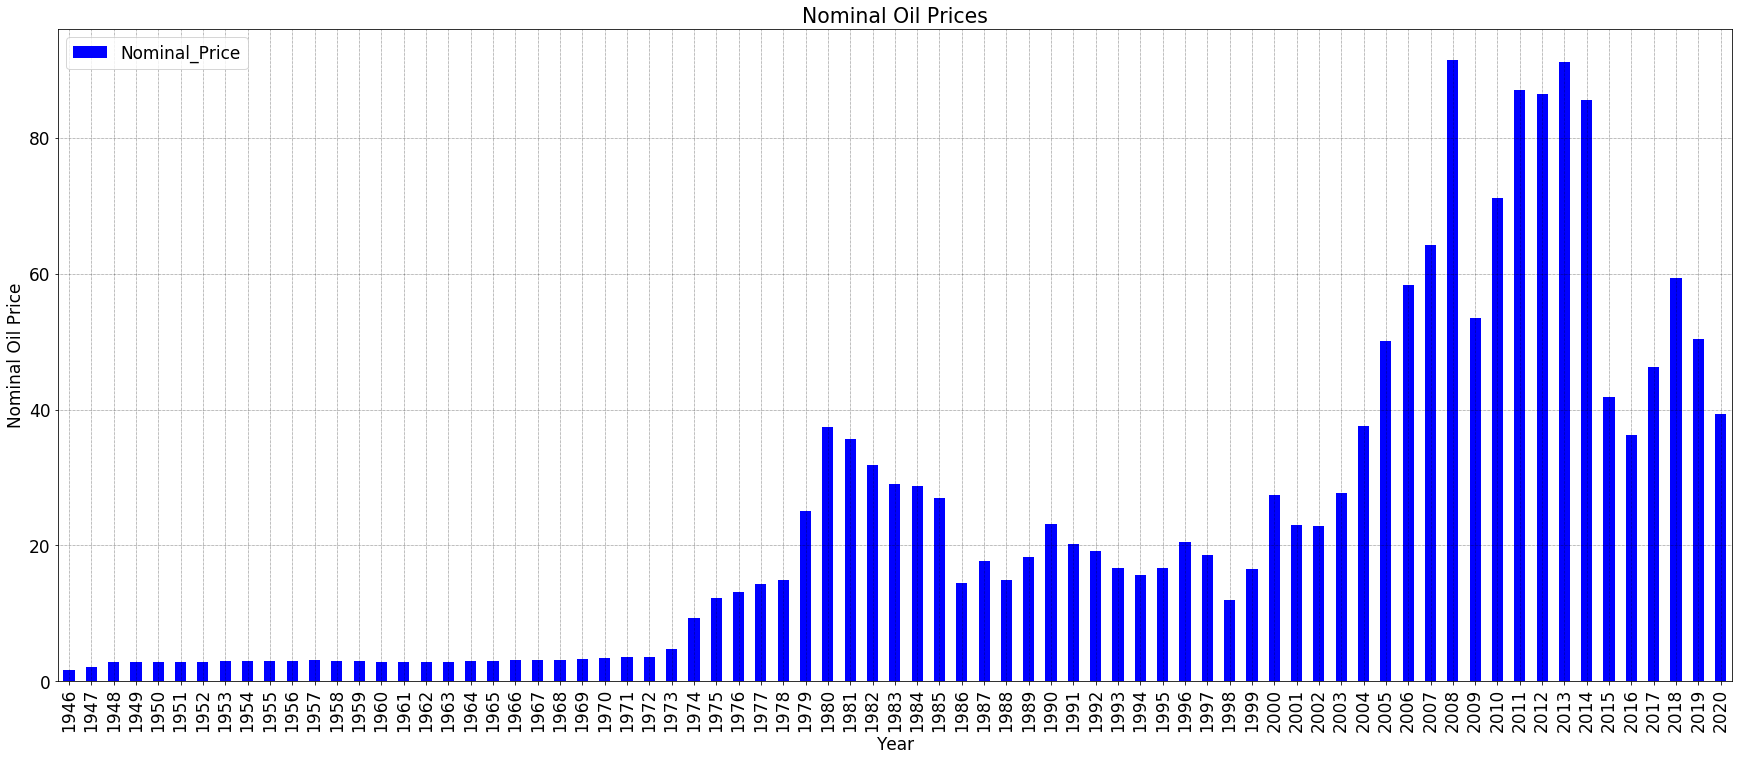

In [33]:
nominal_price_pivot.plot(kind = 'bar', color = 'blue')
plt.title("Nominal Oil Prices")
plt.xlabel("Year")
plt.ylabel("Nominal Oil Price")

In [30]:
inflation_adjusted_price_pivot = pd.pivot_table(df, index = 'Year', values = 'Inflation_Adjusted_Price')

In [31]:
inflation_adjusted_price_pivot

,Inflation_Adjusted_Price
Year,
1946,21.20
1947,24.92
1948,29.73
1949,30.01
1950,30.01
...,...
2016,39.02
2017,43.97
2018,57.77


Text(0, 0.5, 'Inflation Adjusted Price')

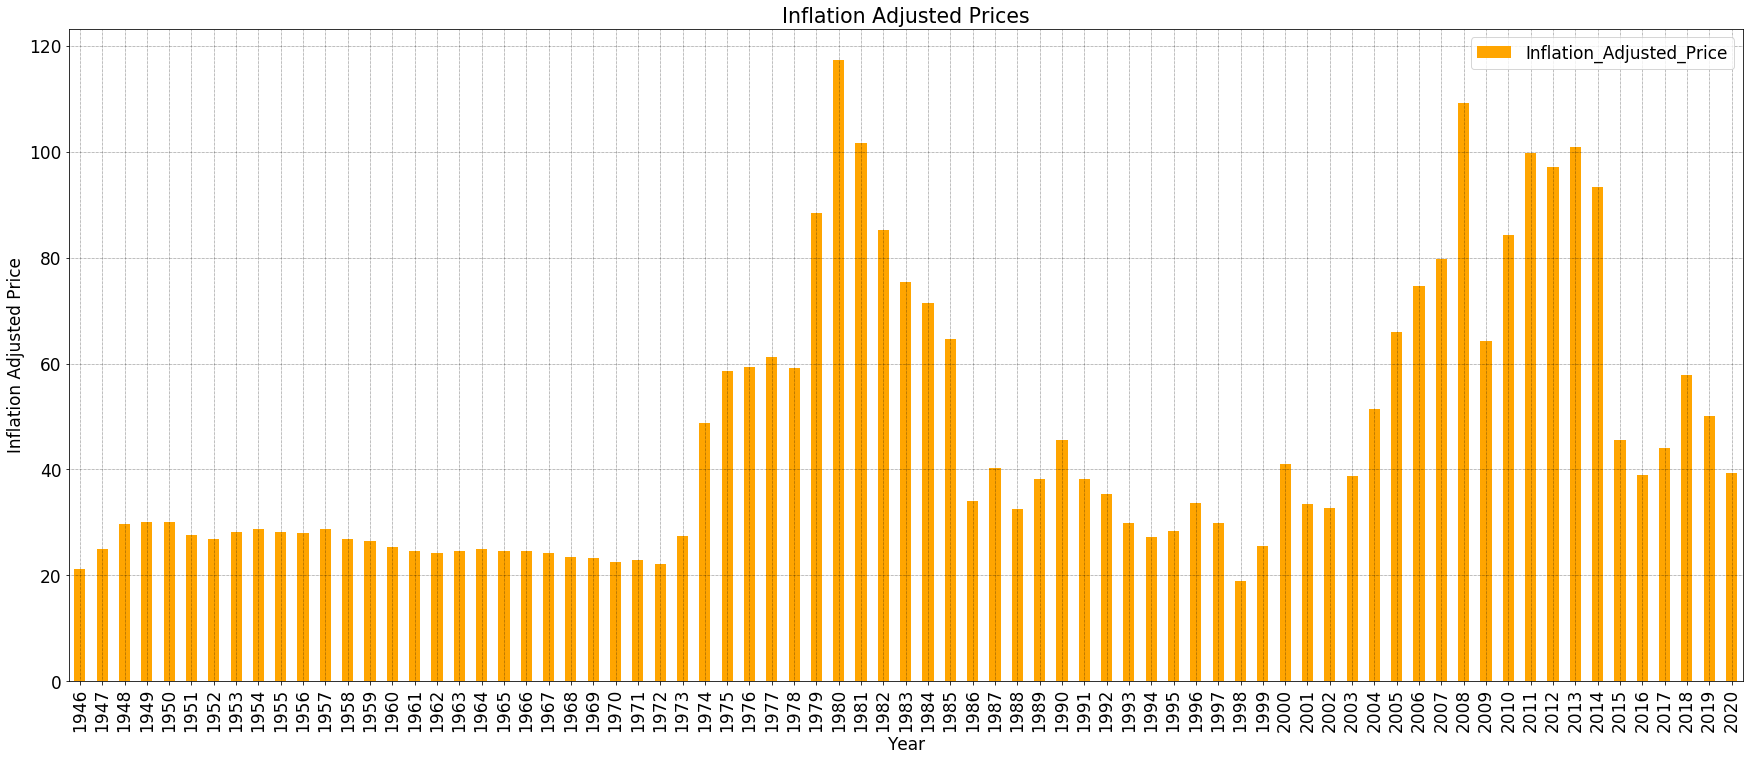

In [34]:
inflation_adjusted_price_pivot.plot(kind = 'bar', color = 'orange')
plt.title("Inflation Adjusted Prices")
plt.xlabel("Year")
plt.ylabel("Inflation Adjusted Price")

In [44]:
NP_AIP_pivot = pd.pivot_table(df, index = 'Nominal_Price', values = 'Inflation_Adjusted_Price')

In [45]:
NP_AIP_pivot

,Inflation_Adjusted_Price
Nominal_Price,
1.63,21.200
2.16,24.920
2.77,28.840
2.85,24.455
2.91,24.970
...,...
85.60,93.240
86.46,97.190
87.04,99.830


Text(0, 0.5, 'Inflation Adjusted Price')

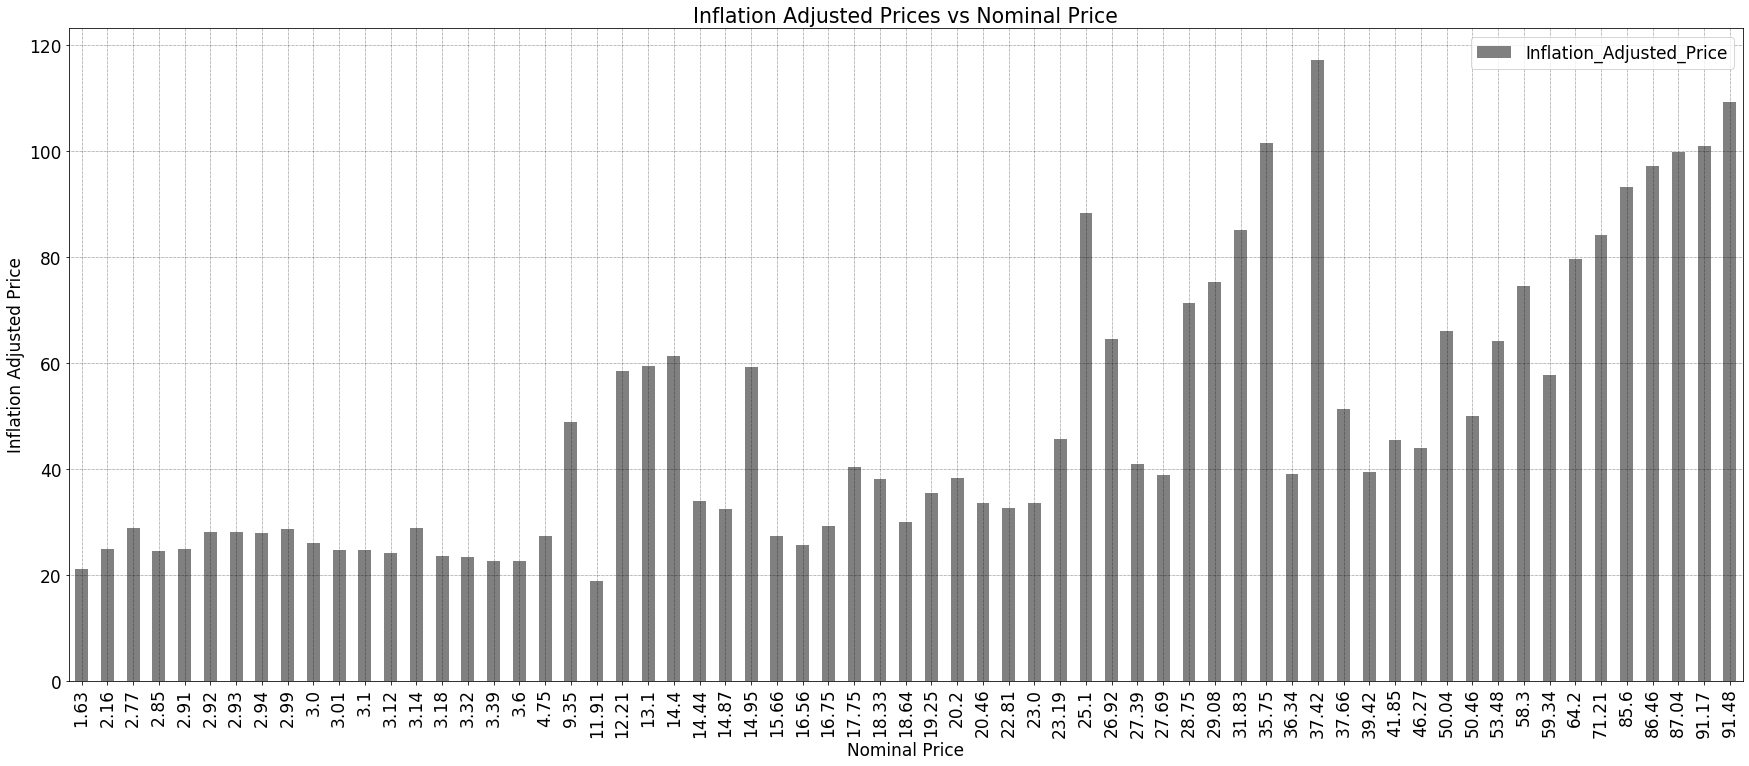

In [47]:
NP_AIP_pivot.plot(kind = 'bar', color = 'grey')
plt.title("Inflation Adjusted Prices vs Nominal Price")
plt.xlabel("Nominal Price")
plt.ylabel("Inflation Adjusted Price")

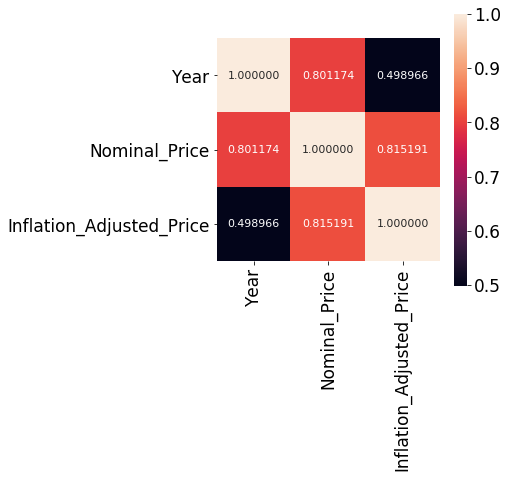

In [43]:
corr = df.corr()
corr = (corr)
plt.figure(figsize = (5,5))
ax = sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '2f', annot_kws =
{'size': 11},
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)
bottom, top = ax.get_ylim()

Text(0, 0.5, 'Nominal Price')

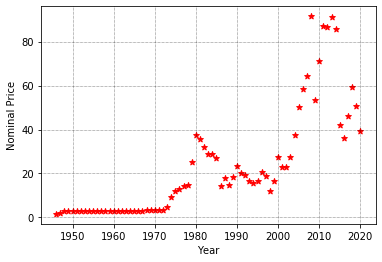

In [120]:
plt.scatter(df.Year, df.Nominal_Price, color = 'red', marker = '*')
plt.xlabel("Year")
plt.ylabel("Nominal Price")

In [ ]:
                ### Regression for Nominal Oil Prices versus Year ###

In [80]:
reg = linear_model.LinearRegression()

In [73]:
X = np.array(df.iloc[: , 0])

In [74]:
X

array([1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [75]:
y = np.array(df.iloc[:, 1])

In [76]:
y

array([ 1.63,  2.16,  2.77,  2.77,  2.77,  2.77,  2.77,  2.92,  2.99,
        2.93,  2.94,  3.14,  3.  ,  3.  ,  2.91,  2.85,  2.85,  2.91,
        3.  ,  3.01,  3.1 ,  3.12,  3.18,  3.32,  3.39,  3.6 ,  3.6 ,
        4.75,  9.35, 12.21, 13.1 , 14.4 , 14.95, 25.1 , 37.42, 35.75,
       31.83, 29.08, 28.75, 26.92, 14.44, 17.75, 14.87, 18.33, 23.19,
       20.2 , 19.25, 16.75, 15.66, 16.75, 20.46, 18.64, 11.91, 16.56,
       27.39, 23.  , 22.81, 27.69, 37.66, 50.04, 58.3 , 64.2 , 91.48,
       53.48, 71.21, 87.04, 86.46, 91.17, 85.6 , 41.85, 36.34, 46.27,
       59.34, 50.46, 39.42])

In [95]:
#1 feature so -1 and 1 for more features 1, -1 to reshape array
X = X.reshape(-1, 1)
X

array([[1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [20

In [96]:
y = y.reshape(-1, 1)
y

array([[ 1.63],
       [ 2.16],
       [ 2.77],
       [ 2.77],
       [ 2.77],
       [ 2.77],
       [ 2.77],
       [ 2.92],
       [ 2.99],
       [ 2.93],
       [ 2.94],
       [ 3.14],
       [ 3.  ],
       [ 3.  ],
       [ 2.91],
       [ 2.85],
       [ 2.85],
       [ 2.91],
       [ 3.  ],
       [ 3.01],
       [ 3.1 ],
       [ 3.12],
       [ 3.18],
       [ 3.32],
       [ 3.39],
       [ 3.6 ],
       [ 3.6 ],
       [ 4.75],
       [ 9.35],
       [12.21],
       [13.1 ],
       [14.4 ],
       [14.95],
       [25.1 ],
       [37.42],
       [35.75],
       [31.83],
       [29.08],
       [28.75],
       [26.92],
       [14.44],
       [17.75],
       [14.87],
       [18.33],
       [23.19],
       [20.2 ],
       [19.25],
       [16.75],
       [15.66],
       [16.75],
       [20.46],
       [18.64],
       [11.91],
       [16.56],
       [27.39],
       [23.  ],
       [22.81],
       [27.69],
       [37.66],
       [50.04],
       [58.3 ],
       [64.2 ],
       [

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [110]:
X_train

array([[2016],
       [1973],
       [1995],
       [2006],
       [2002],
       [1952],
       [1996],
       [2014],
       [1950],
       [2011],
       [1994],
       [1948],
       [1991],
       [2008],
       [1957],
       [1976],
       [1949],
       [2009],
       [1956],
       [1977],
       [1984],
       [2001],
       [1947],
       [1978],
       [2018],
       [1960],
       [1988],
       [1965],
       [1975],
       [2007],
       [1981],
       [1964],
       [1946],
       [2019],
       [1961],
       [1951],
       [1999],
       [1962],
       [1997],
       [1966],
       [2015],
       [1954],
       [1959],
       [1971],
       [1983],
       [1963],
       [1970],
       [1992],
       [1969],
       [1985],
       [2004],
       [1958],
       [1982],
       [1967],
       [1955],
       [2017],
       [2013],
       [2010],
       [1993],
       [1990]])

In [111]:
y_train

array([[36.34],
       [ 4.75],
       [16.75],
       [58.3 ],
       [22.81],
       [ 2.77],
       [20.46],
       [85.6 ],
       [ 2.77],
       [87.04],
       [15.66],
       [ 2.77],
       [20.2 ],
       [91.48],
       [ 3.14],
       [13.1 ],
       [ 2.77],
       [53.48],
       [ 2.94],
       [14.4 ],
       [28.75],
       [23.  ],
       [ 2.16],
       [14.95],
       [59.34],
       [ 2.91],
       [14.87],
       [ 3.01],
       [12.21],
       [64.2 ],
       [35.75],
       [ 3.  ],
       [ 1.63],
       [50.46],
       [ 2.85],
       [ 2.77],
       [16.56],
       [ 2.85],
       [18.64],
       [ 3.1 ],
       [41.85],
       [ 2.99],
       [ 3.  ],
       [ 3.6 ],
       [29.08],
       [ 2.91],
       [ 3.39],
       [19.25],
       [ 3.32],
       [26.92],
       [37.66],
       [ 3.  ],
       [31.83],
       [ 3.12],
       [ 2.93],
       [46.27],
       [91.17],
       [71.21],
       [16.75],
       [23.19]])

In [112]:
x_test

array([1998, 2003, 1968, 2020, 1974, 1972, 2012, 2000, 1980, 1953, 1989,
       2005, 1987, 1986, 1979])

In [113]:
y_test

array([[11.91],
       [27.69],
       [ 3.18],
       [39.42],
       [ 9.35],
       [ 3.6 ],
       [86.46],
       [27.39],
       [37.42],
       [ 2.92],
       [18.33],
       [50.04],
       [17.75],
       [14.44],
       [25.1 ]])

In [99]:
#Model fitting
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
#prediction of model (X_test to come up with predictions)
y_predict = reg.predict(X_test)
y_predict

array([[37.01780778],
       [41.53938815],
       [ 9.88832556],
       [56.9127614 ],
       [15.314222  ],
       [13.50558985],
       [49.67823281],
       [38.82643992],
       [20.74011844],
       [-3.67641555],
       [28.87896311],
       [43.34802029],
       [27.07033096],
       [26.16601489],
       [19.83580237]])

In [108]:
#performance metrics dependency import
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
print('r2_score:  ', score*100)
print('mae:  ', mae)
print('mse:  ', mse)

r2_score:   48.42506267633793
mae:   12.93827235024501
mse:   234.69754931427948


In [ ]:
#Not a high R-Squared shows a low 48.42% for nominal price predictions.
#Mean absolute error is 12.93 somewhat small.  
#High RMSE value of 234.70 indicates a bad fit for data.

In [125]:
#Coefficient
reg.coef_

array([[0.90431607]])

In [126]:
#Intercept
reg.intercept_

array([-1769.80570801])

In [129]:
#Prediction of nominal oil price in 2021
#y = m*x+b / reg.coefficient * year - reg.intercept
0.90431607*2021-1769.80570801

57.817069460000084

In [ ]:
           ### Regression for Nominal vs Adjusted Inflation Price ###

Text(0, 0.5, 'Inflation Adjusted Price')

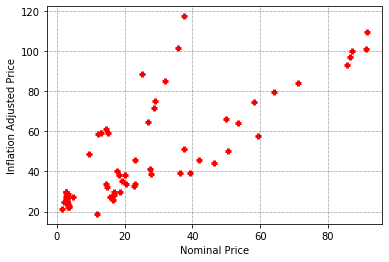

In [122]:
plt.scatter(df.Nominal_Price, df.Inflation_Adjusted_Price, color = 'red', marker = '+')
plt.xlabel("Nominal Price")
plt.ylabel("Inflation Adjusted Price")

In [160]:
reg2 = linear_model.LinearRegression()

In [161]:
#Nominal Price
x = np.array(df.iloc[: , 1])
x

array([ 1.63,  2.16,  2.77,  2.77,  2.77,  2.77,  2.77,  2.92,  2.99,
        2.93,  2.94,  3.14,  3.  ,  3.  ,  2.91,  2.85,  2.85,  2.91,
        3.  ,  3.01,  3.1 ,  3.12,  3.18,  3.32,  3.39,  3.6 ,  3.6 ,
        4.75,  9.35, 12.21, 13.1 , 14.4 , 14.95, 25.1 , 37.42, 35.75,
       31.83, 29.08, 28.75, 26.92, 14.44, 17.75, 14.87, 18.33, 23.19,
       20.2 , 19.25, 16.75, 15.66, 16.75, 20.46, 18.64, 11.91, 16.56,
       27.39, 23.  , 22.81, 27.69, 37.66, 50.04, 58.3 , 64.2 , 91.48,
       53.48, 71.21, 87.04, 86.46, 91.17, 85.6 , 41.85, 36.34, 46.27,
       59.34, 50.46, 39.42])

In [162]:
#Inflation Adjusted Price
Y = np.array(df.iloc[:, -1])
Y

array([ 21.2 ,  24.92,  29.73,  30.01,  30.01,  27.53,  26.92,  28.1 ,
        28.73,  28.18,  27.92,  28.82,  26.82,  26.55,  25.41,  24.6 ,
        24.31,  24.53,  24.95,  24.63,  24.64,  24.14,  23.55,  23.36,
        22.54,  22.94,  22.21,  27.37,  48.84,  58.5 ,  59.4 ,  61.27,
        59.16,  88.38, 117.3 , 101.57,  85.15,  75.34,  71.41,  64.56,
        33.97,  40.3 ,  32.48,  38.13,  45.65,  38.26,  35.39,  29.92,
        27.25,  28.36,  33.63,  29.96,  18.86,  25.58,  41.02,  33.52,
        32.69,  38.84,  51.39,  66.04,  74.59,  79.73, 109.25,  64.19,
        84.24,  99.83,  97.19, 100.95,  93.24,  45.55,  39.02,  43.97,
        57.77,  50.01,  39.42])

In [179]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0)

In [164]:
x_train

array([36.34,  4.75, 16.75, 58.3 , 22.81,  2.77, 20.46, 85.6 ,  2.77,
       87.04, 15.66,  2.77, 20.2 , 91.48,  3.14, 13.1 ,  2.77, 53.48,
        2.94, 14.4 , 28.75, 23.  ,  2.16, 14.95, 59.34,  2.91, 14.87,
        3.01, 12.21, 64.2 , 35.75,  3.  ,  1.63, 50.46,  2.85,  2.77,
       16.56,  2.85, 18.64,  3.1 , 41.85,  2.99,  3.  ,  3.6 , 29.08,
        2.91,  3.39, 19.25,  3.32, 26.92, 37.66,  3.  , 31.83,  3.12,
        2.93, 46.27, 91.17, 71.21, 16.75, 23.19])

In [165]:
x_test

array([11.91, 27.69,  3.18, 39.42,  9.35,  3.6 , 86.46, 27.39, 37.42,
        2.92, 18.33, 50.04, 17.75, 14.44, 25.1 ])

In [166]:
Y_train

array([ 39.02,  27.37,  28.36,  74.59,  32.69,  26.92,  33.63,  93.24,
        30.01,  99.83,  27.25,  29.73,  38.26, 109.25,  28.82,  59.4 ,
        30.01,  64.19,  27.92,  61.27,  71.41,  33.52,  24.92,  59.16,
        57.77,  25.41,  32.48,  24.63,  58.5 ,  79.73, 101.57,  24.95,
        21.2 ,  50.01,  24.6 ,  27.53,  25.58,  24.31,  29.96,  24.64,
        45.55,  28.73,  26.55,  22.94,  75.34,  24.53,  22.54,  35.39,
        23.36,  64.56,  51.39,  26.82,  85.15,  24.14,  28.18,  43.97,
       100.95,  84.24,  29.92,  45.65])

In [167]:
Y_test

array([ 18.86,  38.84,  23.55,  39.42,  48.84,  22.21,  97.19,  41.02,
       117.3 ,  28.1 ,  38.13,  66.04,  40.3 ,  33.97,  88.38])

In [177]:
#1 feature so -1 and 1 for more features 1, -1 to reshape array
x = x.reshape(-1, 1)
x

array([[ 1.63],
       [ 2.16],
       [ 2.77],
       [ 2.77],
       [ 2.77],
       [ 2.77],
       [ 2.77],
       [ 2.92],
       [ 2.99],
       [ 2.93],
       [ 2.94],
       [ 3.14],
       [ 3.  ],
       [ 3.  ],
       [ 2.91],
       [ 2.85],
       [ 2.85],
       [ 2.91],
       [ 3.  ],
       [ 3.01],
       [ 3.1 ],
       [ 3.12],
       [ 3.18],
       [ 3.32],
       [ 3.39],
       [ 3.6 ],
       [ 3.6 ],
       [ 4.75],
       [ 9.35],
       [12.21],
       [13.1 ],
       [14.4 ],
       [14.95],
       [25.1 ],
       [37.42],
       [35.75],
       [31.83],
       [29.08],
       [28.75],
       [26.92],
       [14.44],
       [17.75],
       [14.87],
       [18.33],
       [23.19],
       [20.2 ],
       [19.25],
       [16.75],
       [15.66],
       [16.75],
       [20.46],
       [18.64],
       [11.91],
       [16.56],
       [27.39],
       [23.  ],
       [22.81],
       [27.69],
       [37.66],
       [50.04],
       [58.3 ],
       [64.2 ],
       [

In [176]:
#1 feature so -1 and 1 for more features 1, -1 to reshape array
Y = Y.reshape(-1, 1)
Y

array([[ 21.2 ],
       [ 24.92],
       [ 29.73],
       [ 30.01],
       [ 30.01],
       [ 27.53],
       [ 26.92],
       [ 28.1 ],
       [ 28.73],
       [ 28.18],
       [ 27.92],
       [ 28.82],
       [ 26.82],
       [ 26.55],
       [ 25.41],
       [ 24.6 ],
       [ 24.31],
       [ 24.53],
       [ 24.95],
       [ 24.63],
       [ 24.64],
       [ 24.14],
       [ 23.55],
       [ 23.36],
       [ 22.54],
       [ 22.94],
       [ 22.21],
       [ 27.37],
       [ 48.84],
       [ 58.5 ],
       [ 59.4 ],
       [ 61.27],
       [ 59.16],
       [ 88.38],
       [117.3 ],
       [101.57],
       [ 85.15],
       [ 75.34],
       [ 71.41],
       [ 64.56],
       [ 33.97],
       [ 40.3 ],
       [ 32.48],
       [ 38.13],
       [ 45.65],
       [ 38.26],
       [ 35.39],
       [ 29.92],
       [ 27.25],
       [ 28.36],
       [ 33.63],
       [ 29.96],
       [ 18.86],
       [ 25.58],
       [ 41.02],
       [ 33.52],
       [ 32.69],
       [ 38.84],
       [ 51.39

In [178]:
#Model fitting
reg2.fit(x, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
Y_predict = reg2.predict(x_test)
Y_predict

array([[35.77239894],
       [49.12870409],
       [28.38326435],
       [59.05706019],
       [33.60559659],
       [28.73875536],
       [98.87205347],
       [48.87478193],
       [57.36424585],
       [28.16319848],
       [41.20633297],
       [68.04590433],
       [40.71541682],
       [37.91380908],
       [46.93650952]])

In [181]:
score = r2_score(Y_test, Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
print('r2_score:  ', score*100)
print('mae:  ', mae)
print('mse:  ', mse)

r2_score:   46.95286390738309
mae:   12.923688537827234
mse:   431.94500300680187


In [182]:
reg2.coef_

array([[0.84640717]])

In [183]:
reg2.intercept_

array([25.69168955])

In [184]:
#Prediction of inflation adjusted price when nominal price to look for is $100 
#y = m*x+b / reg.coefficient * nominal price value needed + reg.intercept
0.84640717*100+25.69168955

110.33240655